# Introduction

Author: Nishant Nayar

# RMS Titanic

***RMS Titanic*** was a British passenger liner, operated by the White Star Line, which sank in the North Atlantic Ocean on 15 April 1912 after striking an iceberg during her maiden voyage from Southampton, UK, to New York City. Of the estimated 2,224 passengers and crew aboard, more than 1,500 died, which made the sinking possibly one of the deadliest for a single ship up to that time.It remains to this day the deadliest peacetime sinking of a superliner or cruise ship. The disaster drew much public attention, provided foundational material for the disaster film genre, and has inspired many artistic works.

## Background

Titanic example is the first project that every data enthusiast starts with. There are many articles and topics that talk about the underlying statistics and data science concepts. This is an effort to make this project understandable for all those who are not versed in statistics and concepts of data science. The emphasis here is to make the machine learning models explainable to all.

# Loading Libraries

In [1]:
# linear algebra
import numpy as np

# data processing
import pandas as pd
import re

# fancy tables
import qgrid
from termcolor import colored

# data visualization
import seaborn as sns

# suppressing pesky warnings
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=Warning)

%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score
from sklearn import datasets
from sklearn import model_selection

import optuna
from sklearn import ensemble
from sklearn import datasets
from sklearn import model_selection

In [2]:
pd.set_option("display.max_rows", 500)
pd.set_option("display.max_columns", 500)
pd.set_option("display.width", 1000)

#Setting colors
enmax_palette = ["#FFD966", "#434343" , "#fff2cc", '#fafafa', '#E63A00', '#FF8D67', '#1AFF54', '#B3FFC6', '#A6A6A6']
color_codes_wanted = ['cream', 'black', 'lightcream', 'lightblue', 'red', 'lightred', 'green', 'lightgreen', 'grey']

c = lambda x: enmax_palette[color_codes_wanted.index(x)]

# Exploratory Data Analysis

## Loading Data

We will be first loading the data from Kaggle competiton website. 

In [3]:
test_df = pd.read_csv("test.csv")
train_df = pd.read_csv("train.csv")

In [4]:
train = int(round(len(train_df) / (len(train_df) + len(test_df)), 2) * 100)
test = int(round(len(test_df) / (len(train_df) + len(test_df)), 2) * 100)
print (colored(("The train to test ratio is {0}:{1}".format(train, test)), 'red', attrs=['bold']))

The train to test ratio is 68:32


## Data Elements

### Age and Sex

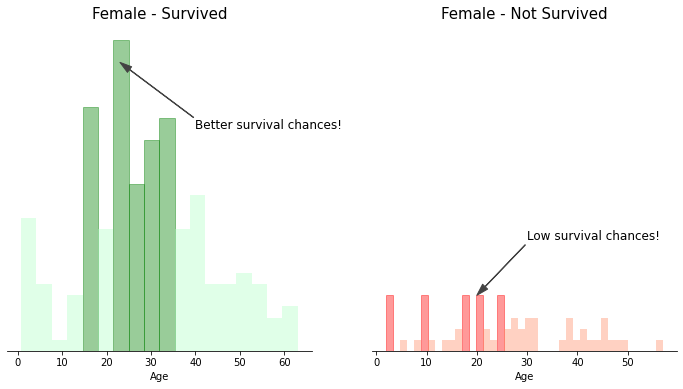

In [5]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6), sharey=True)
survived = 'survived'
not_survived = 'not survived'
women = train_df[train_df['Sex']=='female']
ax=sns.distplot(women[women['Survived']==1].Age.dropna(), bins=18, 
                label = survived,
                kde=False, color=c("lightgreen"),  ax = axes[0])
heights = [p.get_height() for p in ax.patches]
highest = sorted(heights)[-5]
for p in ax.patches:
    if  p.get_height() >= highest:
        p.set_color("green")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.set_yticks([])
ax.annotate('Better survival chances!', xy=(23, 26), xytext=(40, 20), 
            fontsize=12, arrowprops={'width':0.4,'headwidth':7,'color':'#434343'})
ax.set_title('Female - Survived',fontsize=15)
ax=sns.distplot(women[women['Survived']==0].Age.dropna(), bins=40, label = not_survived,kde=False, 
                color=c("lightred"), ax = axes[1])
heights = [p.get_height() for p in ax.patches]
highest = sorted(heights)[-5]
for p in ax.patches:
    if  p.get_height() >= highest:
        p.set_color("red")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.set_yticks([])
ax.annotate('Low survival chances!', xy=(20, 5), xytext=(30, 10), 
            fontsize=12, arrowprops={'width':0.4,'headwidth':7,'color':'#434343'})
_ = ax.set_title('Female - Not Survived', fontsize=15)
fig.savefig('./img/FemaleSurvival.png', transparent=True)

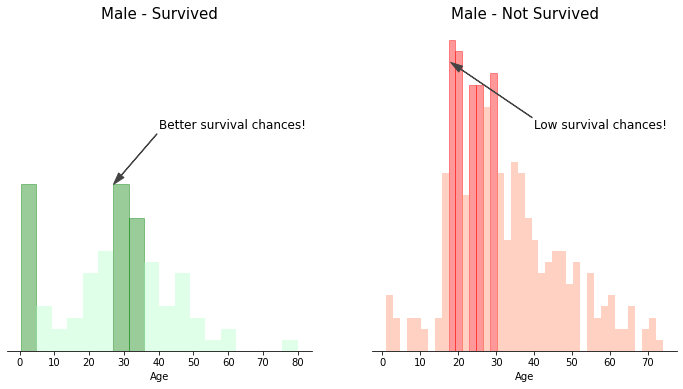

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2,figsize=(12, 6), sharey=True)
survived = 'survived'
not_survived = 'not survived'
men = train_df[train_df['Sex']=='male']
ax=sns.distplot(men[men['Survived']==1].Age.dropna(), bins=18, 
                label = survived,
                kde=False, color=c("lightgreen"),  ax = axes[0])
heights = [p.get_height() for p in ax.patches]
third_highest = sorted(heights)[-3]
for p in ax.patches:
    if  p.get_height() >= third_highest:
        p.set_color("green")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.set_yticks([])
ax.annotate('Better survival chances!', xy=(27, 15), xytext=(40, 20), 
            fontsize=12, 
            arrowprops={'width':0.4,'headwidth':7,'color':'#434343'})
ax.set_title('Male - Survived', fontsize=15)
ax=sns.distplot(men[men['Survived']==0].Age.dropna(), bins=40, 
                label = not_survived,
                kde=False, 
                color=c("lightred"), ax = axes[1])
heights = [p.get_height() for p in ax.patches]
third_highest = sorted(heights)[-5]
for p in ax.patches:
    if  p.get_height() >= third_highest:
        p.set_color("red")
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.set_yticks([])
ax.annotate('Low survival chances!', xy=(18, 26), xytext=(40, 20), 
            fontsize=12, 
            arrowprops={'width':0.4,'headwidth':7,'color':'#434343'})
_ = ax.set_title('Male - Not Survived', fontsize=15)
fig.savefig('./img/MaleSurvival.png', transparent=True)

### Embarked

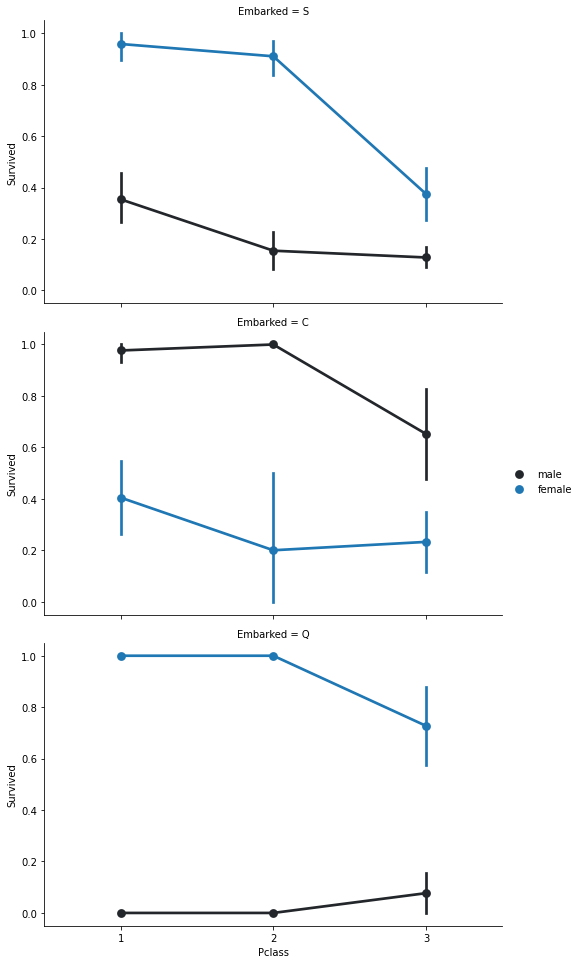

In [7]:
FacetGrid = sns.FacetGrid(train_df, row='Embarked', size=4.5, aspect=1.6)
FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette=None,  order=None, hue_order=None )
FacetGrid.add_legend()

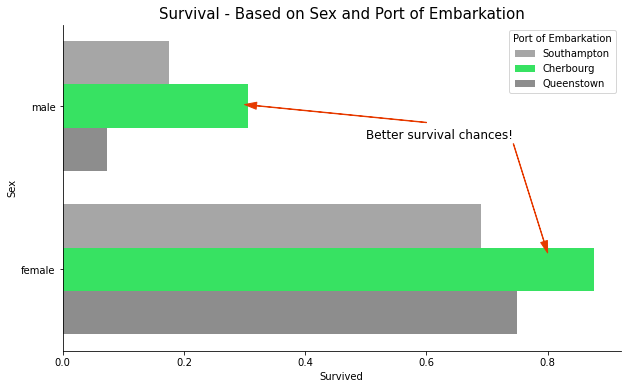

In [8]:
#palette = sns.color_palette("Blues")
#palette.reverse()
colors = ['#A6A6A6', '#1AFF54', '#8D8D8D' ]
sns.set_palette(sns.color_palette(colors))
fig, axes = plt.subplots(figsize=(10, 6))
ax=sns.barplot(x='Survived', 
            y='Sex', 
            hue = 'Embarked',
            data=train_df,
              ci=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.annotate('Better survival chances!', xy=(0.8, 0.9), xytext=(0.5, 0.2), 
            fontsize=12, 
            arrowprops={'width':0.4,'headwidth':7,'color':'#E63A00'})
ax.annotate('',xy=(0.3, -0.01), xytext=(0.6, 0.1), 
                        arrowprops={'width':0.4,'headwidth':7,'color':'#E63A00'})
ax.set_title('Survival - Based on Sex and Port of Embarkation', fontsize=15)
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['Southampton','Cherbourg','Queenstown'],title='Port of Embarkation')
fig.savefig('./img/Embarkation.png', transparent=True)

### Pclass

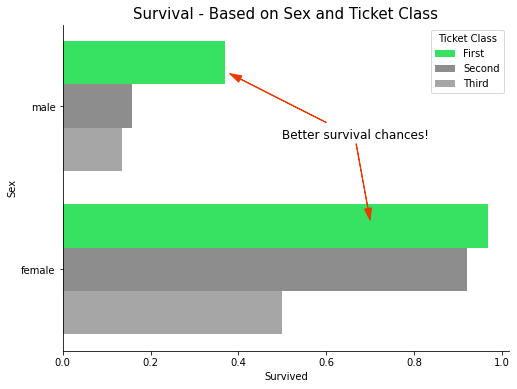

In [9]:
#palette = sns.color_palette("Blues")
#palette.reverse()
colors = ['#1AFF54',  '#8D8D8D', '#A6A6A6']
sns.set_palette(sns.color_palette(colors))
fig, axes = plt.subplots(figsize=(8, 6))
ax=sns.barplot(x='Survived', 
            y='Sex', 
            hue = 'Pclass',
            data=train_df,
              ci=0)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.annotate('Better survival chances!', xy=(0.7, 0.7), xytext=(0.5, 0.2), 
            fontsize=12, 
            arrowprops={'width':0.4,'headwidth':7,'color':'#E63A00'})
ax.annotate('',xy=(0.38, -0.2), xytext=(0.6, 0.1), 
                        arrowprops={'width':0.4,'headwidth':7,'color':'#E63A00'})
ax.set_title('Survival - Based on Sex and Ticket Class', fontsize=15)
legend_labels, _= ax.get_legend_handles_labels()
ax.legend(legend_labels, ['First','Second','Third'],title='Ticket Class')
fig.savefig('./img/Sex-Ticket.png', transparent=True)

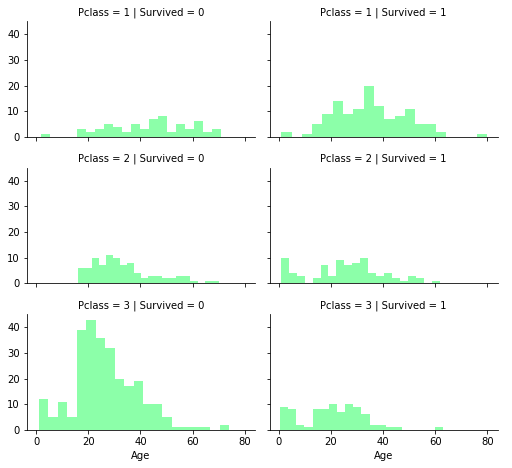

In [10]:
grid = sns.FacetGrid(train_df, col='Survived', row='Pclass', size=2.2, aspect=1.6)
grid.map(plt.hist, 'Age', alpha=.5, bins=20)
grid.add_legend();

### SibSp and Parch

In [11]:
data = [train_df, test_df]
for dataset in data:
    dataset['relatives'] = dataset['SibSp'] + dataset['Parch']
    dataset.loc[dataset['relatives'] > 0, 'not_alone'] = 0
    dataset.loc[dataset['relatives'] == 0, 'not_alone'] = 1
    dataset['not_alone'] = dataset['not_alone'].astype(int)
train_df['not_alone'].value_counts()

1    537
0    354
Name: not_alone, dtype: int64

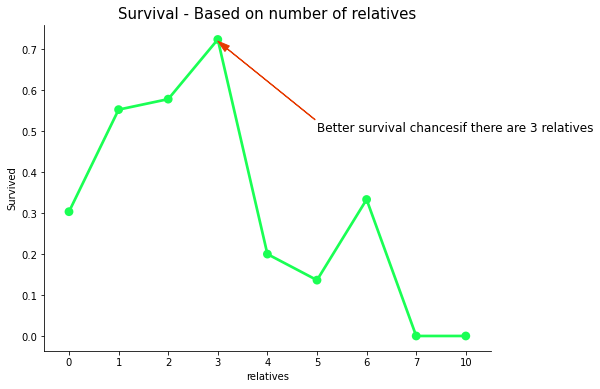

In [12]:
fig, axes = plt.subplots(figsize=(8, 6))
ax = sns.pointplot('relatives','Survived', data=train_df, aspect = 2.5, ci=0)
ax.annotate('Better survival chancesif there are 3 relatives', xy=(3, 0.72), xytext=(5,0.5), 
            fontsize=12, 
            arrowprops={'width':0.4,'headwidth':7,'color':'#E63A00'})   
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.set_title('Survival - Based on number of relatives', fontsize=15)
fig.savefig('./img/Relatives.png', transparent=True)

## Data Preprocessing

### Missing Data

### Train Data

In [13]:
# Quick check to see data columns
total = train_df.isnull().sum().sort_values(ascending=False)
percent_1 = train_df.isnull().sum() / train_df.isnull().count() * 100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data_train = pd.concat([total, percent_2], axis=1, keys=["Total", "%"])
missing_data_train

,Total,%
Cabin,687,77.1
Age,177,19.9
Embarked,2,0.2
PassengerId,0,0.0
Survived,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0


In [14]:
qgrid_widget = qgrid.show_grid(missing_data_train, show_toolbar=True)
qgrid_widget

QgridWidget(grid_options={'fullWidthRows': True, 'syncColumnCellResize': True, 'forceFitColumns': True, 'defau…

In [15]:
# Quick check to see data columns
total = test_df.isnull().sum().sort_values(ascending=False)
percent_1 = test_df.isnull().sum() / test_df.isnull().count() * 100
percent_2 = (round(percent_1, 1)).sort_values(ascending=False)
missing_data_test = pd.concat([total, percent_2], axis=1, keys=["Total", "%"])
missing_data_test

,Total,%
Cabin,327,78.2
Age,86,20.6
Fare,1,0.2
PassengerId,0,0.0
Pclass,0,0.0
Name,0,0.0
Sex,0,0.0
SibSp,0,0.0
Parch,0,0.0
Ticket,0,0.0


### Dropping Columns

In [16]:
train_df = train_df.drop(['PassengerId'], axis=1)

#### Cabin

In [ ]:
deck = {"A": 1, "B": 2, "C": 3, "D": 4, "E": 5, "F": 6, "G": 7, "U": 8}
data = [train_df, test_df]

for dataset in data:
    dataset['Cabin'] = dataset['Cabin'].fillna("U0")
    dataset['Deck'] = dataset['Cabin'].map(lambda x: re.compile("([a-zA-Z]+)").search(x).group())
    dataset['Deck'] = dataset['Deck'].map(deck)
    dataset['Deck'] = dataset['Deck'].fillna(0)
    dataset['Deck'] = dataset['Deck'].astype(int)
# we can now drop the cabin feature
train_df = train_df.drop(['Cabin'], axis=1)
test_df = test_df.drop(['Cabin'], axis=1)

#### Age

In [ ]:
data = [train_df, test_df]

for dataset in data:
    mean = train_df["Age"].mean()
    std = test_df["Age"].std()
    is_null = dataset["Age"].isnull().sum()
    # compute random numbers between the mean, std and is_null
    rand_age = np.random.randint(mean - std, mean + std, size = is_null)
    # fill NaN values in Age column with random values generated
    age_slice = dataset["Age"].copy()
    age_slice[np.isnan(age_slice)] = rand_age
    dataset["Age"] = age_slice
    dataset["Age"] = train_df["Age"].astype(int)
train_df["Age"].isnull().sum()

#### Embarked

In [ ]:
train_df['Embarked'].describe()

In [ ]:
common_value = 'S'
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [ ]:
ports = {"S": 0, "C": 1, "Q": 2}
data = [train_df, test_df]

for dataset in data:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

### Converting Feature

#### Fare

In [ ]:
data = [train_df, test_df]

for dataset in data:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

#### Name

In [ ]:
data = [train_df, test_df]
titles = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Rare": 5}

for dataset in data:
    # extract titles
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)
    # replace titles with a more common title or as Rare
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 'Dr',\
                                            'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')
    # convert titles into numbers
    dataset['Title'] = dataset['Title'].map(titles)
    # filling NaN with 0, to get safe
    dataset['Title'] = dataset['Title'].fillna(0)
train_df = train_df.drop(['Name'], axis=1)
test_df = test_df.drop(['Name'], axis=1)

#### Sex

In [ ]:
genders = {"male": 0, "female": 1}
data = [train_df, test_df]

for dataset in data:
    dataset['Sex'] = dataset['Sex'].map(genders)

#### Ticket

In [ ]:
train_df = train_df.drop(['Ticket'], axis=1)
test_df = test_df.drop(['Ticket'], axis=1)

### Creating Categories

#### Age

In [ ]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age'] = dataset['Age'].astype(int)
    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
    dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
    dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
    dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
    dataset.loc[ dataset['Age'] > 66, 'Age'] = 6

# let's see how it's distributed train_df['Age'].value_counts()

#### Fare

In [ ]:
data = [train_df, test_df]

for dataset in data:
    dataset.loc[ dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare']   = 2
    dataset.loc[(dataset['Fare'] > 31) & (dataset['Fare'] <= 99), 'Fare']   = 3
    dataset.loc[(dataset['Fare'] > 99) & (dataset['Fare'] <= 250), 'Fare']   = 4
    dataset.loc[ dataset['Fare'] > 250, 'Fare'] = 5
    dataset['Fare'] = dataset['Fare'].astype(int)

### Creating New Categories

#### Age time Class

In [ ]:
data = [train_df, test_df]
for dataset in data:
    dataset['Age_Class']= dataset['Age']* dataset['Pclass']

#### Fare per person

In [ ]:
for dataset in data:
    dataset['Fare_Per_Person'] = dataset['Fare']/(dataset['relatives']+1)
    dataset['Fare_Per_Person'] = dataset['Fare_Per_Person'].astype(int)

# Model

In [ ]:
X_train = train_df.drop("Survived", axis=1)
Y_train = train_df["Survived"]
X_test  = test_df.drop("PassengerId", axis=1).copy()

## Stochastic Gradient Descent (SGD)

In [ ]:
sgd = linear_model.SGDClassifier(max_iter=5, tol=None)
sgd.fit(X_train, Y_train)
Y_pred = sgd.predict(X_test)

sgd.score(X_train, Y_train)

acc_sgd = round(sgd.score(X_train, Y_train) * 100, 2)

## Random Forest

In [ ]:
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, Y_train)

Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)
acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)

## Logistic Regression

In [ ]:
logreg = LogisticRegression()
logreg.fit(X_train, Y_train)

Y_pred = logreg.predict(X_test)

acc_log = round(logreg.score(X_train, Y_train) * 100, 2)

## K Nearest Neighbor:

In [ ]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, Y_train)  
Y_pred = knn.predict(X_test)  
acc_knn = round(knn.score(X_train, Y_train) * 100, 2)

## Gaussian Naive Bayes:

In [ ]:
gaussian = GaussianNB() 
gaussian.fit(X_train, Y_train)  
Y_pred = gaussian.predict(X_test)  
acc_gaussian = round(gaussian.score(X_train, Y_train) * 100, 2)

## Perceptron:

In [ ]:
perceptron = Perceptron(max_iter=5)
perceptron.fit(X_train, Y_train)

Y_pred = perceptron.predict(X_test)

acc_perceptron = round(perceptron.score(X_train, Y_train) * 100, 2)

## Linear Support Vector Machine:

In [ ]:
linear_svc = LinearSVC()
linear_svc.fit(X_train, Y_train)

Y_pred = linear_svc.predict(X_test)

acc_linear_svc = round(linear_svc.score(X_train, Y_train) * 100, 2)

## Decision Tree

In [ ]:
decision_tree = DecisionTreeClassifier() 
decision_tree.fit(X_train, Y_train) 
Y_pred = decision_tree.predict(X_test)  
acc_decision_tree = round(decision_tree.score(X_train, Y_train) * 100, 2)

## Best Model

In [ ]:
results = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression', 
              'Random Forest', 'Naive Bayes', 'Perceptron', 
              'Stochastic Gradient Decent', 
              'Decision Tree'],
    'Score': [acc_linear_svc, acc_knn, acc_log, 
              acc_random_forest, acc_gaussian, acc_perceptron, 
              acc_sgd, acc_decision_tree]})
result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

## K-Fold Cross Validation:

In [ ]:
rf = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rf, X_train, Y_train, cv=100, scoring = "accuracy")
print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

### Feature Importance

In [ ]:
importances = pd.DataFrame({'feature':X_train.columns,'importance':np.round(random_forest.feature_importances_,3)})
importances = importances.sort_values('importance',ascending=False).set_index('feature')
importances.head(15)

In [ ]:
importances.plot.bar()

In [ ]:
train_df  = train_df.drop("not_alone", axis=1)
test_df  = test_df.drop("not_alone", axis=1)

train_df  = train_df.drop("Parch", axis=1)
test_df  = test_df.drop("Parch", axis=1)

### Retraining model

In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=100,  oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

## Hyperparameter Tuning

In [ ]:
#Step 1. Define an objective function to be maximized.
def objective(trial):

    classifier_name = trial.suggest_categorical("classifier", ["LogReg", "RandomForest"])
    
    # Step 2. Setup values for the hyperparameters:
    if classifier_name == 'LogReg':
        logreg_c = trial.suggest_float("logreg_c", 1e-10, 1e10, log=True)
        classifier_obj = linear_model.LogisticRegression(C=logreg_c)
    else:
        rf_n_estimators = trial.suggest_int("rf_n_estimators", 10, 1000)
        rf_max_depth = trial.suggest_int("rf_max_depth", 2, 32, log=True)
        classifier_obj = ensemble.RandomForestClassifier(
            max_depth=rf_max_depth, n_estimators=rf_n_estimators
        )

    # Step 3: Scoring method:
    score = model_selection.cross_val_score(classifier_obj, X_train, Y_train, n_jobs=-1, cv=3)
    accuracy = score.mean()
    return accuracy

# Step 4: Running it
study = optuna.create_study(direction="maximize")
study.optimize(objective, n_trials=500)

In [ ]:
# Getting the best trial:
print(f"The best trial is : \n{study.best_trial}")

# Getting the best score:
print(f"The best value is : \n{study.best_value}")

# Getting the best parameters:
print(f"The best parameters are : \n{study.best_params}")


In [ ]:
# Random Forest

random_forest = RandomForestClassifier(n_estimators=361, max_depth=6, oob_score = True)
random_forest.fit(X_train, Y_train)
Y_prediction = random_forest.predict(X_test)

random_forest.score(X_train, Y_train)

acc_random_forest = round(random_forest.score(X_train, Y_train) * 100, 2)
print(round(acc_random_forest,2,), "%")

In [ ]:
optuna.visualization.plot_optimization_history(study)

In [ ]:
optuna.visualization.plot_parallel_coordinate(study)

In [ ]:
optuna.visualization.plot_slice(study)

In [ ]:
optuna.visualization.plot_contour(study, params=['rf_max_depth','rf_n_estimators' ])